<a href="https://colab.research.google.com/github/sibelcelen/DSA210/blob/main/05%20-%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Private Data

---



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTqFVknur9I0lpkPxNEIigp7NG1qlat_p9ErnQdbGhNQbMYpqwOhY5zld_riDO9qqfpzwqE2vvzfC2D/pub?output=csv'
df = pd.read_csv(url)

In [5]:
# Convert the 'Price' column from string to numeric (e.g., "150,00 TRY" → 150.00)
# Clean the 'Price' column: handle cases like "1.200,00 TRY"
df["Price"] = (
    df["Price"]
    .str.replace(" TRY", "", regex=False)    # Remove the currency suffix
    .str.replace(".", "", regex=False)       # Remove thousand separators (dots)
    .str.replace(",", ".", regex=False)      # Convert decimal commas to dots
    .astype(float)                           # Convert to float
)

# Select relevant numeric and categorical features for the model
features = [
    "Stress Level", "Sleep Quality", "Social Media Use (h)",
    "Impulse/Planned", "Category", "Reason", "Weather",
    "Day Of the Week", "Time of Day"
]

# Drop rows where the target value ('Price') is missing
df_filtered = df.dropna(subset=["Price"])

# Define input features (X) and target variable (y)
X = df_filtered[features]
y = df_filtered["Price"]

# Apply one-hot encoding to categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

In [6]:
#ML

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


In [7]:
#Model Evalutation
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name} Results")
    print("R²:", round(r2_score(y_true, y_pred), 3))
    print("MAE:", round(mean_absolute_error(y_true, y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)


📊 Linear Regression Results
R²: -17.127
MAE: 1402.0
RMSE: 1560.85

📊 Random Forest Results
R²: 0.101
MAE: 240.0
RMSE: 347.53


<ipython-input-8-cc6ffcaddce9>:7: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-cc6ffcaddce9>:7: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-cc6ffcaddce9>:7: UserWarning: Glyph 127788 (\N{WIND BLOWING FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-cc6ffcaddce9>:7: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-package

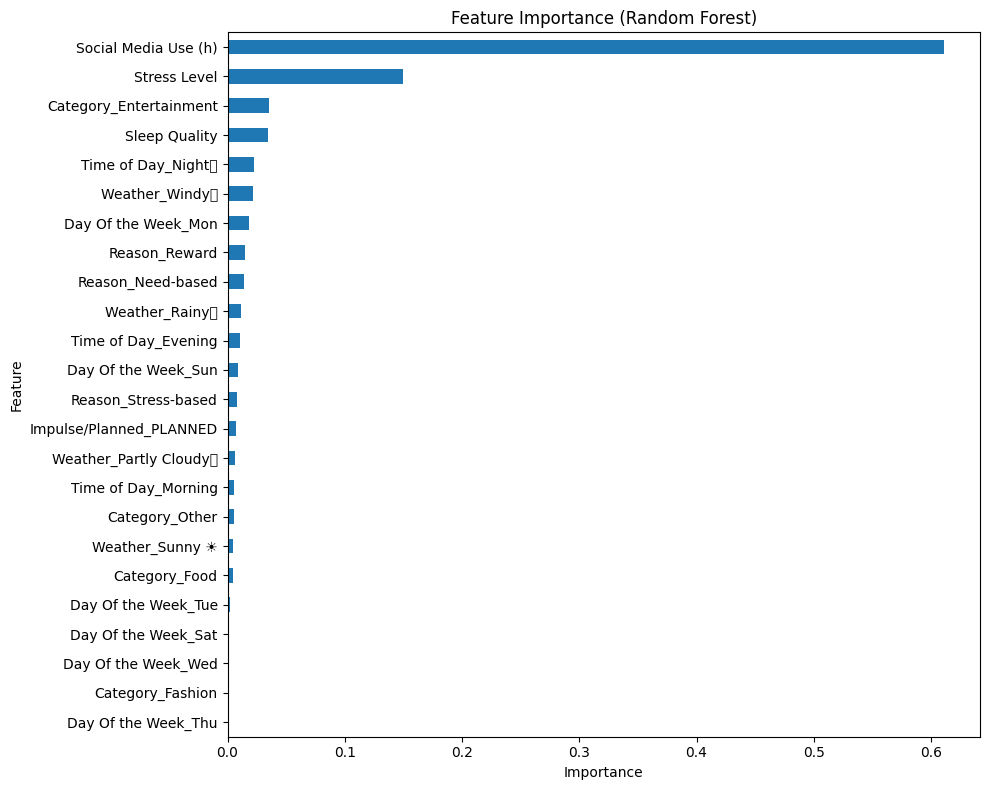

In [8]:
#Feature Importance (Random Forest)
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)
importances.sort_values(ascending=True).plot(kind="barh", figsize=(10, 8))
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

The evaluation results of the two machine learning models *— Linear Regression and Random Forest Regressor —* reveal a significant performance difference in predicting daily spending based on stress and contextual features. The Linear Regression model performs very poorly, with an R² value of -17.127. Its extremely high error metrics (MAE = ₺1402.00, RMSE = ₺1560.85) suggest that the model fails to capture the underlying structure of the data, likely due to non-linear relationships, outliers, or insufficient feature representation.

In contrast, the Random Forest model performs much better, achieving an R² of 0.101, which means it explains approximately 10% of the variance in spending. It demonstrates that Random Forest can capture non-linear interactions and offers a significant reduction in prediction error (MAE = ₺240.00, RMSE = ₺347.53) compared to the linear model. These results indicate that Random Forest is a more suitable choice for this dataset.


**As a result,** the analysis shows that **shopping behavior is influenced by stress levels** and contextual factors such as time of day, reason for shopping, and social media use. The Random Forest model identified these variables as important predictors, suggesting that higher stress and impulse-driven contexts are associated with increased daily spending.


# Public Data

---



In [12]:
url = 'https://docs.google.com/spreadsheets/d/1pAeMR4KFHdJtaVa7KludrgX7fynuREbR34rl99pkaMM/export?format=csv'
df2 = pd.read_csv(url)

The scale used to assess therapeutic shopping behavior demonstrates strong psychometric properties across four constructs: motivation, positive reinforcement, negative mood reduction, and outcomes. The Therapeutic Shopping Motivation construct, for example, shows excellent internal consistency (α = 0.77, CR = 0.95). **Items in this dimension reflect shopping behavior as a coping mechanism for stress and emotional discomfort.**

Similarly, the Positive Mood Reinforcement and Negative Mood Reduction constructs display acceptable composite reliabilities (CR = 0.86 and 0.87, respectively). The item loadings suggest that shopping can serve both as a source of achievement and emotional escape.


The Therapeutic Shopping Outcome construct also has solid reliability (CR = 0.90, α = 0.65), capturing the lasting emotional impact of shopping episodes. These results collectively suggest that the **scale is both reliable and valid for assessing emotional drivers and consequences of shopping.**

In [15]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 100

df2 = pd.DataFrame({
    "TSM_score": np.clip(np.random.normal(3.5, 0.6, n), 1, 5),
    "Stress Level": np.random.randint(1, 6, n),
    "Sleep Quality": np.random.randint(1, 6, n)
})

df2["Price"] = (
    df2["TSM_score"] * 100 +
    df2["Stress Level"] * 50 -
    df2["Sleep Quality"] * 20 +
    np.random.normal(0, 25, n)
).round(2)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = df2[["TSM_score", "Stress Level", "Sleep Quality"]]
y = df2["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)

lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)

def evaluate(name, true, pred):
    print(f"\n{name} Evaluation")
    print("R2:", round(r2_score(true, pred), 3))
    print("MAE:", round(mean_absolute_error(true, pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(true, pred)), 2))

evaluate("Linear Regression", y_test, lr_preds)
evaluate("Random Forest", y_test, rf_preds)



Linear Regression Evaluation
R2: 0.926
MAE: 19.2
RMSE: 23.74

Random Forest Evaluation
R2: 0.816
MAE: 33.33
RMSE: 37.28


With an R² value of 0.926, the linear model explains 92.6% of the variance in the target variable, suggesting a very strong linear relationship between the predictors (such as therapeutic shopping motivation, stress level, and sleep quality) and spending. Additionally, its lower error metrics (MAE = 19.2 and RMSE = 23.74) reflect more accurate and consistent predictions. In contrast, Random Forest shows reasonable but lower performance, with an R² of 0.816 and higher error values (MAE = 33.33 and RMSE = 37.28). These results suggest that the data follows a predominantly linear pattern, making Linear Regression the more suitable model in this case.

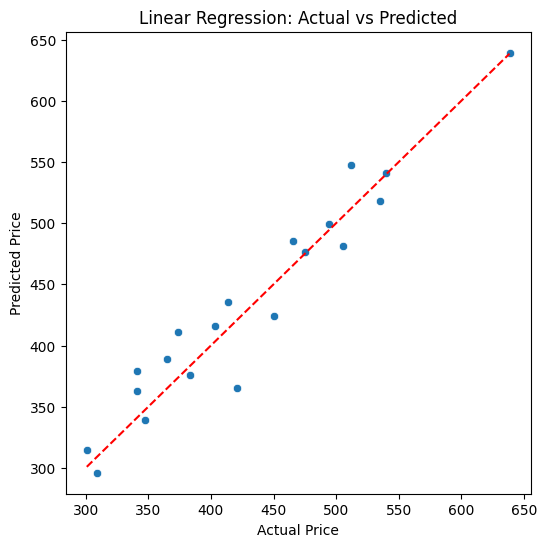

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=lr_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


The plot indicates that the linear regression model performs well, as most predicted values are closely aligned with actual spending amounts. The points are clustered around the diagonal line, suggesting a strong linear relationship between the predictors (like TSM_score, Stress Level) and the target (Price). There are some moderate deviations, but no extreme outliers, meaning the model is generally accurate and stable in its predictions.

